In [1]:
import numpy as np
import sys

from keras.models import load_model
from progressbar import ProgressBar

module_path = '/home/ajuric/faks/sem4/diplomski/consensus-net/src/python/utils/'
if module_path not in sys.path:
    print('Adding utils module.')
    sys.path.append(module_path)

import visualization

/home/ajuric/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Adding utils module.


## Load data

In [2]:
X_validate, y_validate = np.load('./dataset-n20-X-validate.npy'), np.load('./dataset-n20-y-validate.npy')

In [2]:
# # Reshaping because of old model congifuration mor models 7 and 11.
# new_X = list()
# num_data = X_validate.shape[0]
# num_columns = X_validate[0].shape[1]
# neighbourhood_size = X_validate[0].shape[0]
# with ProgressBar(max_value=num_data) as progress_bar:
#     for i, xi in enumerate(X_validate):
#         new_xi = np.dstack(
#             [xi[:, col_index].reshape(neighbourhood_size, 1)
#              for col_index in range(num_columns)]
#         )
#         new_X.append(new_xi)
#         progress_bar.update(i)

# new_X = np.array(new_X)
# X_validate_old = new_X

In [3]:
print(X_validate.shape)
print(y_validate.shape)

(3109078, 41, 5)
(3109078, 6)


## Helper functions

In [3]:
def generate_predictions(probabilities):
    predictions = np.zeros(probabilities.shape)
    predictions[np.arange(probabilities.shape[0]), np.argmax(probabilities, axis=1)] = 1
    return predictions

## Investigate model 11

In [11]:
model = load_model('./model-11.h5')

probabilities = model.predict(X_validate)
predictions = generate_predictions(probabilities)

#### Visualize random incorrect

perm [1398364]


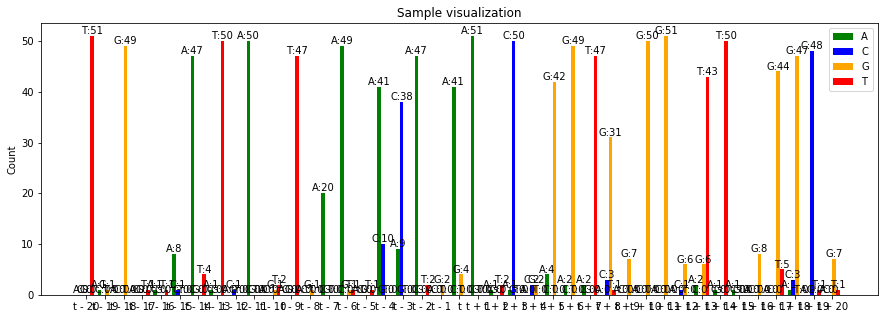

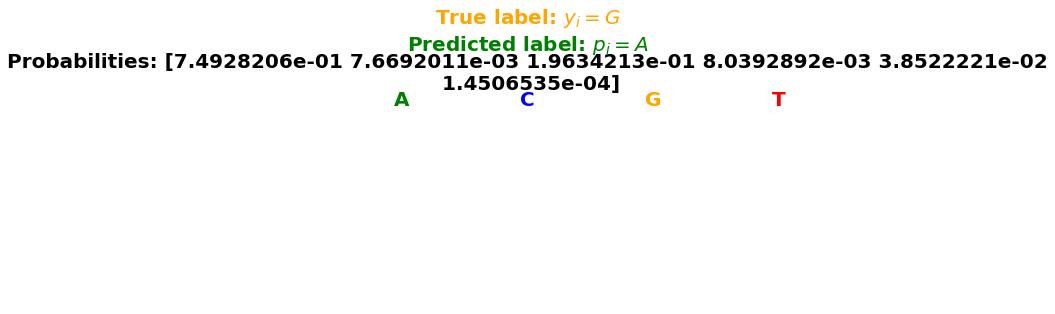

In [19]:
num_display = 1
correct_indices = np.where(np.any(predictions != y_validate, axis=1))[0]
permuted_correct_indices = np.random.permutation(correct_indices)[:num_display]
print('perm', permuted_correct_indices)

counter = 0
for xi, yi, prob_i, pred_i in zip(X_validate[permuted_correct_indices], y_validate[permuted_correct_indices], probabilities[permuted_correct_indices], predictions[permuted_correct_indices]):
    visualization.visualize_sample(xi, yi, prob_i, pred_i)

## Investigate model 15

In [4]:
model = load_model('./model-15.h5')

probabilities = model.predict(X_validate)
predictions = generate_predictions(probabilities)

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


### Visualize random incorrect

perm [506543]


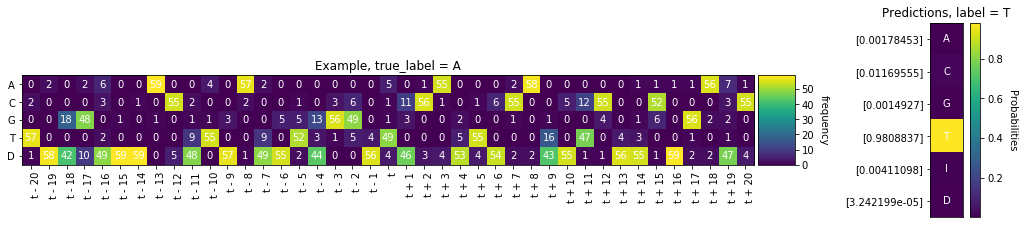

In [54]:
num_display = 1
incorrect_indices = np.where(np.any(predictions != y_validate, axis=1))[0]
permuted_incorrect_indices = np.random.permutation(incorrect_indices)[:num_display]
print('perm', permuted_incorrect_indices)

counter = 0
for xi, yi, prob_i, pred_i in zip(X_validate[permuted_incorrect_indices], y_validate[permuted_incorrect_indices], probabilities[permuted_incorrect_indices], predictions[permuted_incorrect_indices]):
    visualization.visualize_prediction(xi, yi, prob_i, pred_i)

### Visualize random correct

perm [456563]


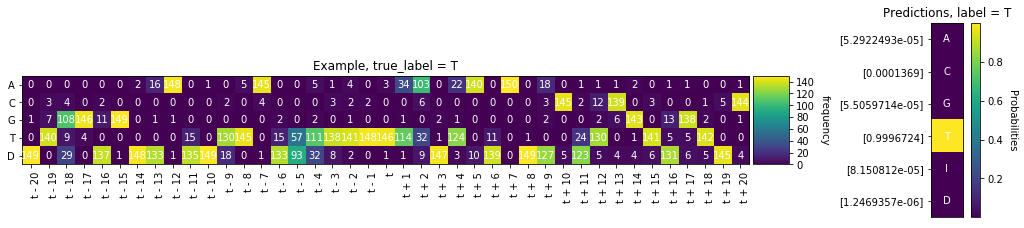

In [53]:
num_display = 1
correct_indices = np.where(np.all(predictions == y_validate, axis=1))[0]
permuted_correct_indices = np.random.permutation(correct_indices)[:num_display]
print('perm', permuted_correct_indices)

counter = 0
for xi, yi, prob_i, pred_i in zip(X_validate[permuted_correct_indices], y_validate[permuted_correct_indices], probabilities[permuted_correct_indices], predictions[permuted_correct_indices]):
    visualization.visualize_prediction(xi, yi, prob_i, pred_i)

### Inspect incorrect predictions

Total number of data: 32250
Number of A: 6055
Number of C: 5883
Number of G: 5947
Number of T: 5736
Number of I: 7926
Number of D: 703


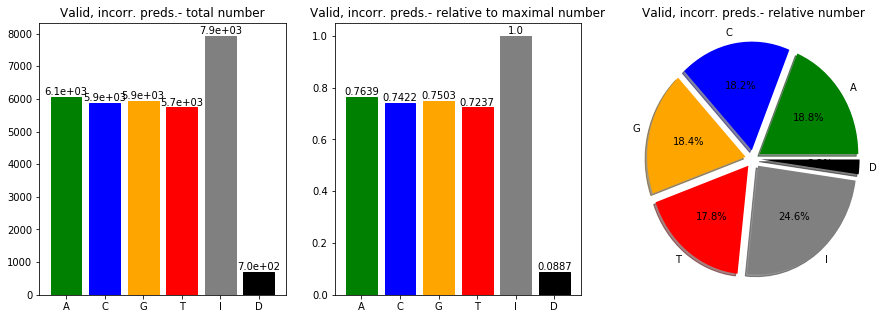

In [59]:
incorrect_indices = np.where(np.any(predictions != y_validate, axis=1))[0]
visualization.dataset_classes_summary(predictions[incorrect_indices], 'Valid, incorr. preds.')

### Inspect correct predictions

Total number of data: 3076828
Number of A: 394122
Number of C: 427364
Number of G: 425682
Number of T: 394077
Number of I: 1434299
Number of D: 1284


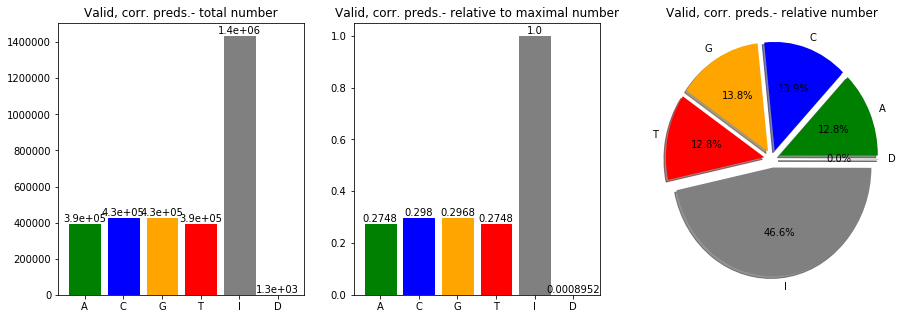

In [58]:
correct_indices = np.where(np.all(predictions == y_validate, axis=1))[0]
visualization.dataset_classes_summary(predictions[correct_indices], 'Valid, corr. preds.')